## Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

In [1]:
# импорт библиотек для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display_html 
from datetime import datetime, timedelta

In [2]:
# загрузка данных с переменные
visits, orders, costs = (
    pd.read_csv('..../visits_info_short.csv'),
    pd.read_csv('..../orders_info_short.csv'),
    pd.read_csv('..../costs_info_short.csv')
)

In [3]:
# знакомство с данными
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Описание данных**

В нашем распоряжении три датасета.


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**1.** Таблица `visits` хранит лог сервера с информацией о посещениях сайта (6 столбцов и 309901 строка, типы данных по столбцам: int64(1), object(5)):
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


**2.**  Таблица `orders` — информацию о покупках (3 столбца и 40212 строк, типы данных по столбцам: float64(1), int64(1), object(1)):
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**3.** Таблица `costs` — информацию о расходах на рекламу (30 столбца и 1800 строк, типы данных по столбцам:  float64(1), object(2)):
* `Channel` — идентификатор рекламного источника,
* `Dt` — дата проведения рекламной кампании,
* `Costs` — расходы на эту кампанию.

Пропущенных значений в таблицах нет.

Все названия столбцов нужно привести к одному регистру и общему стилю.

Также в таблицах есть столбцы, содержащие данные о датах и времени покупки, проведения рекламной компании, начала/окончаниея сессии, но тип данных `object`, заменим его на `datetime`.

In [7]:
# приведение столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [8]:
# переименование столбцов
visits = visits.rename(
    columns={
        'user id': 'user_id',
        'session start': 'session_start',
        'session end': 'session_end'
    }
)
orders = orders.rename(
    columns={
        'user id': 'user_id',
        'event dt': 'event_dt'
    }
)

In [9]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [10]:
#приведение значений в котегориальных столбцах к общему регистру для проверки на дубликаты
check_list = ['region', 'device', 'channel']
for col in visits:
    if col in check_list:
        visits[col] = visits[col].str.lower()

costs['channel'] = costs['channel'].str.lower()

In [11]:
#проверка на дубликаты
print(visits.duplicated().sum())
print(costs.duplicated().sum())
orders.duplicated().sum()

0
0


0

<div style="border:solid green 1px; padding: 10px">

У нас в распоряжении есть:
* лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 01 мая 2019 г. по 27 октября 2019г.;
* выгрузка их покупок за этот период;
* а также статистика рекламных расходов.


Предварительно можно утверждать, что данных достаточно для оценки эффективности привлечения пользователей.

## Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешено использовать функции, с которыми мы познакомились в теоретических уроках (наполним их нашими данными).

### Пользовательский профиль

In [12]:
# функция для создания пользовательских профилей
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt']  = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей (проверка, есть ли id пользователей из profiles в orders)
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    # объединяем траты на рекламу и число привлечённых пользователей по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей результаты сохраним в столбец acq_cost (CAC)
    costs['acq_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acq_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # органические пользователи не связаны с данными о рекламе, поэтому в столбце acq_cost
    # у них значения NaN заменим их на ноль, ведь стоимость привлечения равна нулю
    
    profiles['acq_cost'] = profiles['acq_cost'].fillna(0)
    
    # возвращаем профили с CAC
    return profiles

### Retention Rate (Коэффициент удержания пользователей)

In [13]:
# функция для расчета удержания
def get_retention(profiles, visits, observ_date, horizon_days, dimensions=[], ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observ_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observ_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    # если в индексах таблицы удержания только payer, добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки в первой строим кривые
    # удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих пользователей
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих пользователей
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show() 

### Conversion Rate (Коэффициент конверсии)

In [15]:
# функция для расчета конверсии
def get_conversion(profiles, orders, observ_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observ_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observ_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # находим дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time  

In [16]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### LTV, CAC, ROI («Пожизненная ценность» клиента, стоимость привлечения одного клиента,  окупаемость инвестиций).

In [17]:
def get_ltv_roi(profiles, orders, observ_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observ_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observ_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, добавив параметры из dimensions
        cac = df[['user_id', 'acq_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acq_cost': 'mean'})
            .rename(columns={'acq_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return (result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time)

In [18]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
# задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
1. Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
2. Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
3. По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [19]:
# строим профили
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acq_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [20]:
# определяем минимальную и максимальную дату привлечения пользователей
max_dt = pd.to_datetime(profiles['dt']).dt.date.max()
min_dt =pd.to_datetime(profiles['dt']).dt.date.min()
print('Минимальная дата привлечения:', min_dt)
print('Максимальная дата привлечения:', max_dt)

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


In [21]:
# какие страны дают больше всего платящих пользователей
group_by_region = (
    profiles.query('payer == True').groupby('region').agg({'user_id': 'nunique'})
    .merge(profiles.groupby('region').agg({'user_id': 'nunique'}), on='region')
    .rename(columns={'user_id_x': 'paying_users',
                    'user_id_y': 'all_users'})
    .reset_index()
)
# доля платящих пользователей от общего числа пользователей из этого региона
group_by_region['paying_part_by_region'] = round(group_by_region['paying_users'] / group_by_region['all_users'] * 100, 2)
# доля платящих пользователей от общего числа пользователей приложения
group_by_region['paying_part_by_total'] = (round(group_by_region['paying_users'] / group_by_region['all_users']
                                                 .sum() * 100, 2))
group_by_region.sort_values(by='paying_part_by_total', ascending=False)

,region,paying_users,all_users,paying_part_by_region,paying_part_by_total
3,united states,6902,100002,6.90,4.60
2,uk,700,17575,3.98,0.47
0,france,663,17450,3.80,0.44
1,germany,616,14981,4.11,0.41


In [22]:
# c каких устройств чаще всего заходят платящие пользователи
group_by_device = (
    profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'})
    .merge(profiles.groupby('device').agg({'user_id': 'nunique'}), on='device')
    .rename(columns={'user_id_x': 'paying_users',
                    'user_id_y': 'all_users'})
    .reset_index()
)
# доля платящих пользователей от общего числа пользователей этого устройства
group_by_device['paying_part_by_device'] = round(group_by_device['paying_users'] / group_by_device['all_users'] * 100, 2)
# доля платящих пользователей от общего числа пользователей приложения
group_by_device['paying_part_by_total'] = (round(group_by_device['paying_users'] / group_by_device['all_users']
                                                 .sum() * 100, 2))
group_by_device.sort_values(by='paying_part_by_total', ascending=False)

,device,paying_users,all_users,paying_part_by_device,paying_part_by_total
1,iphone,3382,54479,6.21,2.25
0,android,2050,35032,5.85,1.37
2,mac,1912,30042,6.36,1.27
3,pc,1537,30455,5.05,1.02


In [23]:
# какие каналы приносят больше всего платящих пользователей
group_by_channel = (
    profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'})
    .merge(profiles.groupby('channel').agg({'user_id': 'nunique'}), on='channel')
    .rename(columns={'user_id_x': 'paying_users',
                    'user_id_y': 'all_users'})
    .reset_index()
)
# доля платящих пользователей от общего числа пользователей из этого канала
group_by_channel['paying_part_by_channel'] = (round(group_by_channel['paying_users'] / group_by_channel['all_users']
                                                    * 100, 2))
# доля платящих пользователей от общего числа пользователей приложения
group_by_channel['paying_part_by_total'] = (round(group_by_channel['paying_users'] / group_by_channel['all_users']
                                                  .sum() * 100, 2))
group_by_channel.sort_values(by='paying_part_by_total', ascending=False)

,channel,paying_users,all_users,paying_part_by_channel,paying_part_by_total
1,faceboom,3557,29144,12.20,2.37
8,tiptop,1878,19561,9.60,1.25
6,organic,1160,56439,2.06,0.77
9,wahoonetbanner,453,8553,5.30,0.30
0,adnonsense,440,3880,11.34,0.29
7,rocketsuperads,352,4448,7.91,0.23
3,leapbob,262,8553,3.06,0.17
5,opplecreativemedia,233,8605,2.71,0.16
2,lambdamediaads,225,2149,10.47,0.15
10,yrabbit,165,4312,3.83,0.11


<div style="border:solid green 1px; padding: 10px">
    
1. Посететители приходят к нам из:
* США
* Франции
* Германии
* Великобритании.

Больше всего платящих пользователей из `США` (6902 человека) их доля от общего числа пользователей приложения составляет больше 4.5%, а меньше всего из `Германии` (616 человек) и их доля меньше половины процента (0.41%).

2. Наши пользователи используют следующие устройства:
* Mac
* IPhone
* PC
* Android

Больше всего платящих пользователей заходят с `IPhone` (3382 человека) - доля 2.25% от всех использующих приложение пользователей, а меньше всего c `PC` (1537 человек) - доля 1.02% от общего.

3. Каналы привлечения пользователей:

* Faceboom
* Organic
* Adnonsense
* Yrabbit
* Mediatornado
* Rocketsuperads
* Leapbob
* Tiptop
* Wahoonetbanner
* Opplecreativemedia
* Lambdamediaads

Больше всего платящих пользователей пришло по каналу `Faceboom` (3557 человек) и это 2.37% от общего числа пользователей приложения, а меньше всего по `Mediatornado` (156 человек), что составляет 0.10%.

## Маркетинг

Выясним:
1. Сколько денег потратили? Всего / на каждый источник / по времени.
2. Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [24]:
#общая сумма расходов на маркетинг
print('Общая сумма расходов:', round(costs['costs'].sum(), 2))

Общая сумма расходов: 105497.3


In [25]:
# как траты распределены по источникам
costs_by_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()
#расчитаем долю затрат по каждому каналу от общей суммы затрат
costs_by_channel['part_by_channel'] =round(costs_by_channel['costs'] / costs_by_channel['costs'].sum() * 100, 2)
costs_by_channel

,channel,costs,part_by_channel
0,tiptop,54751.30,51.90
1,faceboom,32445.60,30.75
2,wahoonetbanner,5151.00,4.88
3,adnonsense,3911.25,3.71
4,opplecreativemedia,2151.25,2.04
5,rocketsuperads,1833.00,1.74
6,leapbob,1797.60,1.70
7,lambdamediaads,1557.60,1.48
8,mediatornado,954.48,0.90
9,yrabbit,944.22,0.90


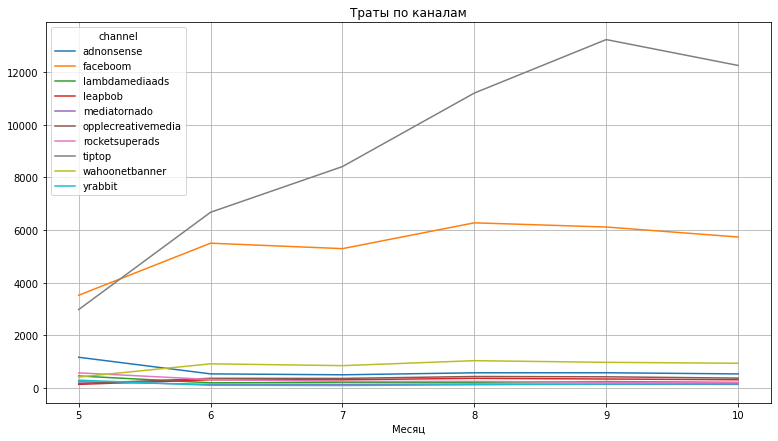

In [26]:
# построим график изменений трат по каналам
costs['month'] = costs['dt'].dt.month
(costs
 .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
 .plot(grid=True, figsize=(13,7))
)
plt.xlabel('Месяц')
plt.title('Траты по каналам')
plt.show()

In [27]:
# как траты распределены по времени (месяцам)
costs_by_month = costs.groupby('month').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()
#расчитаем долю затрат за каждый месяц от общей суммы
costs_by_month['part_by_month'] = round(costs_by_month['costs'] / costs_by_month['costs'].sum() * 100, 2)
costs_by_month

,month,costs,part_by_month
0,9,22441.340,21.27
1,10,20882.415,19.79
2,8,20657.870,19.58
3,7,16447.060,15.59
4,6,15090.045,14.30
5,5,9978.570,9.46


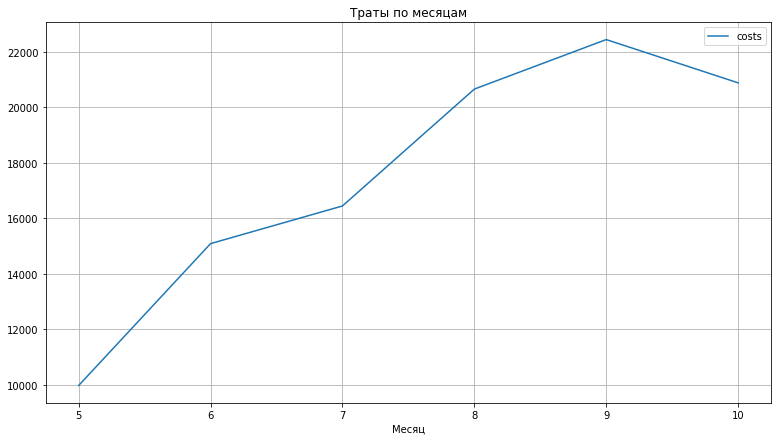

In [28]:
# построим график изменений трат по времени
costs.groupby('month').agg({'costs': 'sum'}).plot(grid=True, figsize=(13,7))
plt.xlabel('Месяц')
plt.title('Траты по месяцам')
plt.show() 

<div style="border:solid green 1px; padding: 10px">
    
**1.** Всего потратили 105 497,30. Из них больше всего на канал `TipTop` - 54 751,30, а меньше всего на канал `Yrabbit` - 944,22. Самым затратным вышел сентябрь, почти 22,5 тысячи и меньше всего потратили в мае - около 10 тысяч. Распределение затрат наглядно видно на графиках.

**2.** Выясним, как меняется стоимость привлечения для каждого источника трафика используя профили пользователей. В профилях есть столбец `acq_cost` со стоимостью привлечения каждого посетителя по дате и источнику привлечения. Построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений.

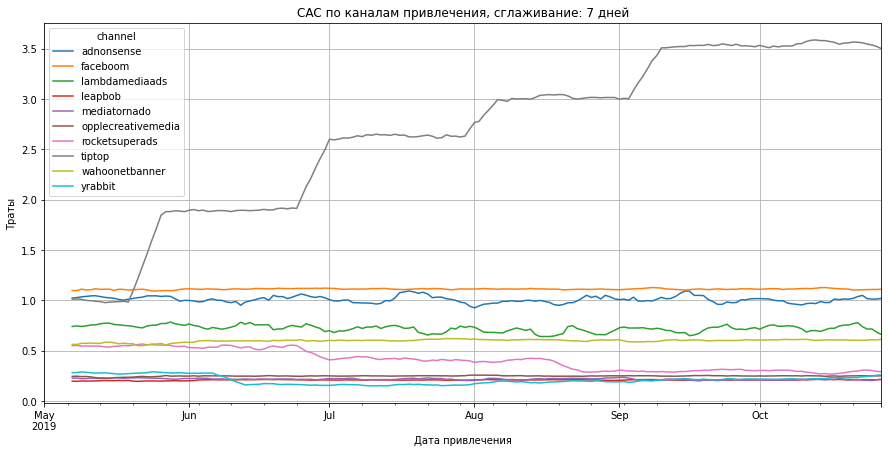

In [29]:
# строим график истории изменений CAC по каналам привлечения c окном сглаживания в 7 дней
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

report = (profiles.query('channel != "organic"')
          .pivot_table(index='dt', columns='channel', values='acq_cost', aggfunc='mean')
         )
window = 7
filter_data(report, window).plot(grid = True, figsize=(15, 7))
plt.title('CAC по каналам привлечения, сглаживание: {} дней'.format(window))
plt.ylabel('Траты')
plt.xlabel('Дата привлечения')
plt.show()

In [30]:
# группируем траты по каналам и находим среднее значение CAC
(
    profiles.query('channel != "organic"')
    .groupby(['channel']).agg({'acq_cost': 'mean'})
    .sort_values(by='acq_cost', ascending=False).round(2)
    .reset_index()
)

,channel,acq_cost
0,tiptop,2.80
1,faceboom,1.11
2,adnonsense,1.01
3,lambdamediaads,0.72
4,wahoonetbanner,0.60
5,rocketsuperads,0.41
6,opplecreativemedia,0.25
7,yrabbit,0.22
8,mediatornado,0.22
9,leapbob,0.21


In [31]:
print('Cреднее значение CAC на одного пользователя:',
      profiles.query('channel != "organic"')['acq_cost'].mean().round(2))

Cреднее значение CAC на одного пользователя: 1.13


<div style="border:solid green 1px; padding: 10px">
    
Стоимость привлечения «органических» пользователей равна нулю, потому что они "пришли" к нам самостоятельно, а не благодаря рекламе. Траты на привлечение одного пользователя по всем каналам стабильны, кроме `TipTop`, затраты на который "скачут" от месяца к месяцу довольно резко на увеличение (от ≈ 1.35 в мае до ≈ 3.55 в октябре). Самое дешевое привлечение обходится компании в среднем в ≈ 0.21 (канал `Leapbob`), а самое дорогое по каналу `TipTop`- ≈ 2.80. 

## Оценим окупаемость рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим.

Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

С помощью LTV и ROI проанализируем:

1. Общую окупаемость рекламы.
2. Окупаемость рекламы с разбивкой по рекламным каналам.
3. Окупаемость рекламы с разбивкой по странам. 
4. Окупаемость рекламы с разбивкой по устройствам.

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI для всех пунктов выше.
Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? 

### Проанализируем общую окупаемость рекламы

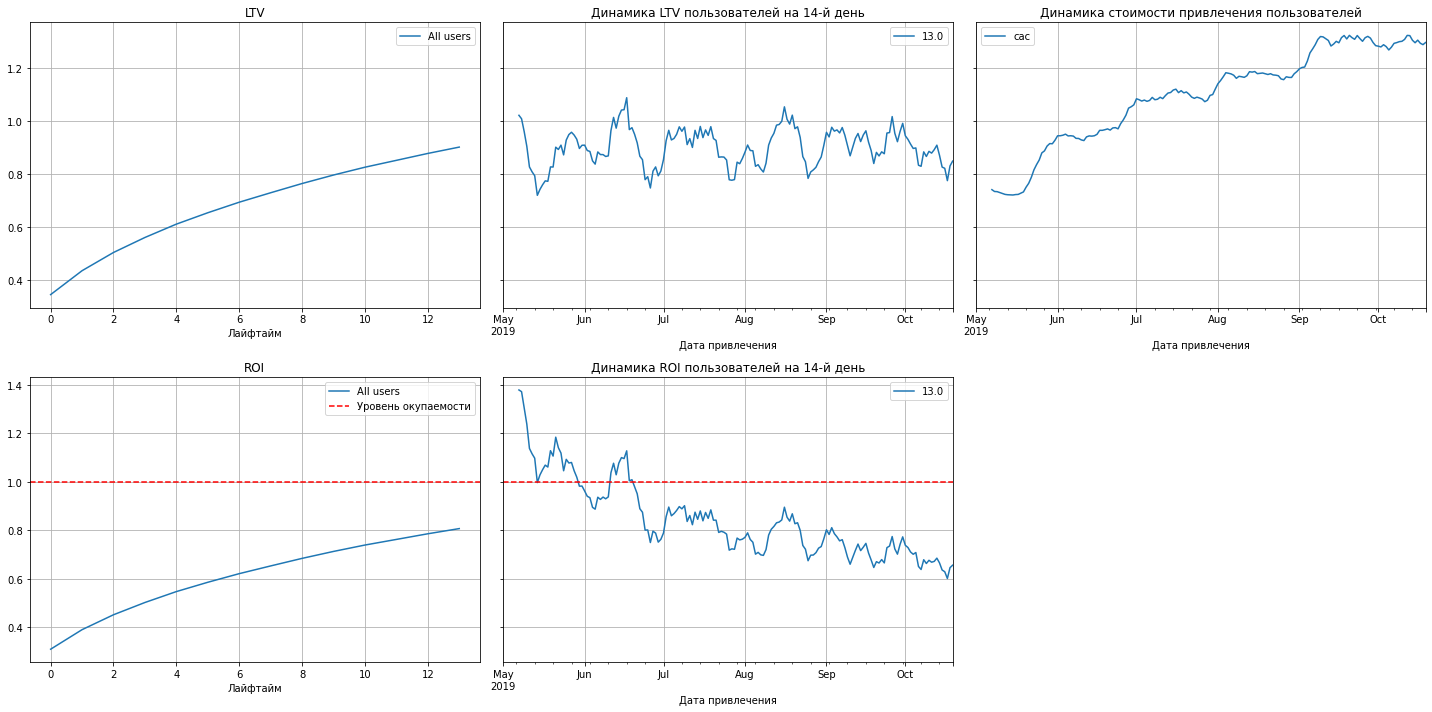

In [32]:
# считаем LTV и ROI, CAC
observ_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles = profiles.query('channel!="organic"')
#получаем данные и строим графики
result_raw, ltv, ltv_history, roi, roi_history = get_ltv_roi(profiles, orders, observ_date, horizon_days)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы:
* Реклама не окупается. ROI в конце второй недели — около 80%, т.е. можно сказать, что величина затрат не превысила порог окупаемости. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, но при данных затратах этого не происходит, с середины июня динамика ROI стабильно ниже порога окупаемости, отмеченного на графике красным.
* CAC не стабилен. Скорее всего, дело  в скачкообразном увеличении рекламного бюджета на привлечение через канал `TipTop`.
* LTV достаточно стабилен. Значит, с качеством пользователей все нормально. Но его значение не превышает САС на одного пользователя, а следовательно средняя накопительная выручка от одного клиента не превышает средние затраты на его привлечение.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

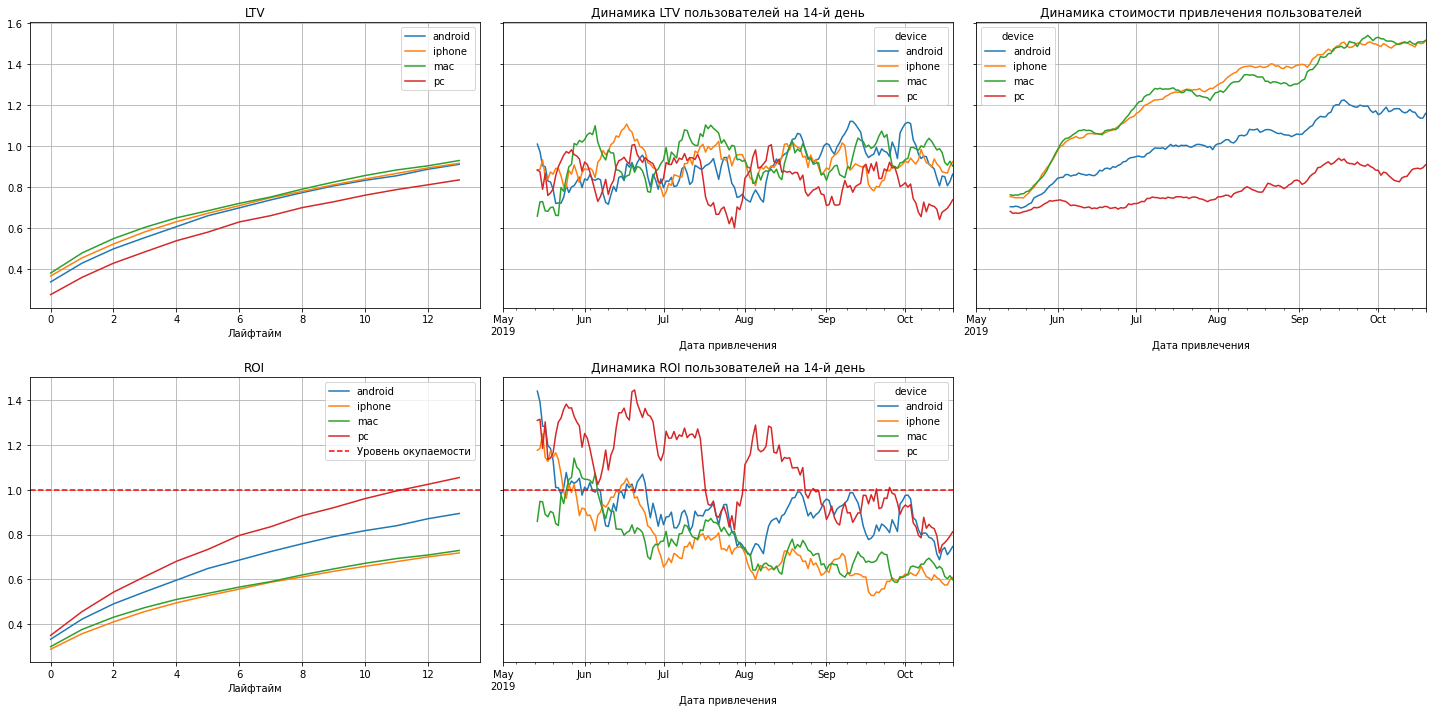

In [33]:
#получаем данные и строим графики
result_raw, ltv, ltv_history, roi, roi_history = (get_ltv_roi(profiles, orders, observ_date,
                                                              horizon_days,dimensions=['device'])
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы:
    
* Реклама не окупается по всем устройствам, кроме `PC` (с 11го дня).
* Стоимость привлечения плавно увеличивается и примерно одинакова для `Mac`и `Iphone`, а по `Android`и `PC` она ниже.
* LTV стабилен, качество `PC` пользователей чуть хуже остальных.

### Проанализируем окупаемость рекламы с разбивкой по странам

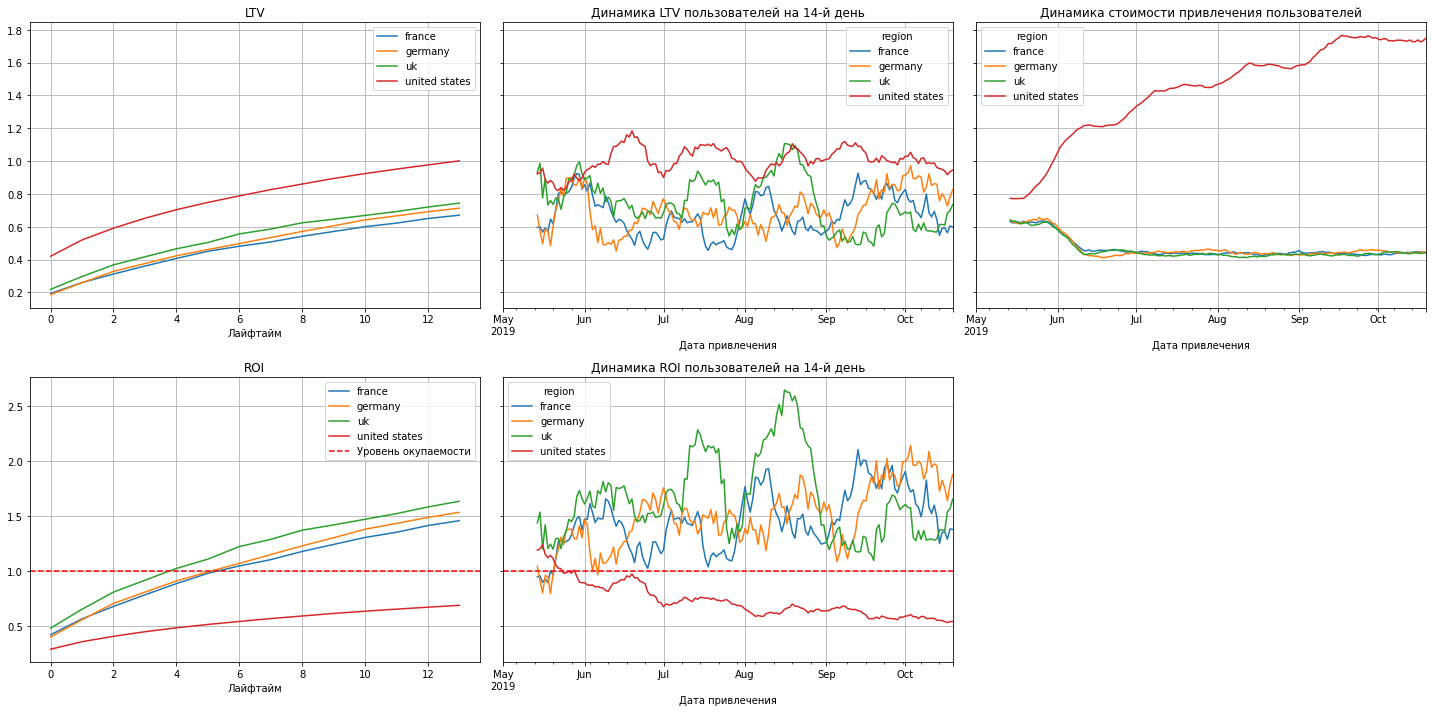

In [34]:
#получаем данные и строим графики
result_raw, ltv, ltv_history, roi, roi_history = (get_ltv_roi(profiles, orders, observ_date,
                                                              horizon_days,dimensions=['region'])
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы:
    
* Реклама не окупается только по `США`, остальные страны, с 4-5 дней, окупаются.
* Стоимость привлечения стабильна и примерно одинакова для всех стран, кроме `США`, кривая очень похожа на график по тратам на канал `TipTop`.
* LTV стабилен и примерно одинаков для всех, кроме `США`, пользователи из `США` сильно лучше.

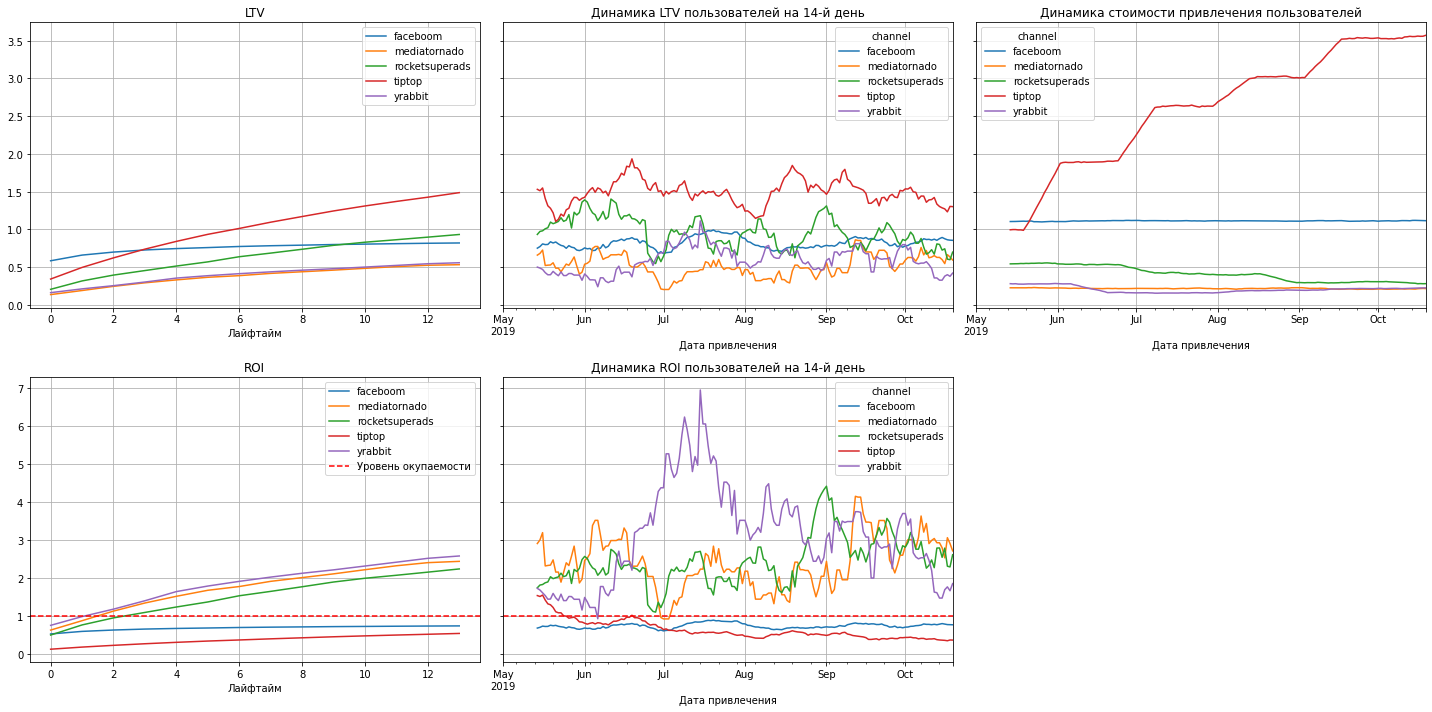

In [35]:
#посмотрим показатели отдельно по США для каналов
profiles_usa = profiles.query('region == "united states"')
result_raw_usa, ltv_usa, ltv_history_usa, roi_usa, roi_history_usa = (get_ltv_roi(profiles_usa, orders, observ_date,
                                                                                  horizon_days,dimensions=['channel']))
plot_ltv_roi(ltv_usa, ltv_history_usa, roi_usa, roi_history_usa, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы по рекламе в `США`:
* LTV выше всего по каналу `TipTop`, где-то с 3го дня, явных "отстающих" нет
* стоимость привлечения резко увеличивается со второй половины мая для канала `TipTop` и далее ростет более плавно волнообразно вверх, остальные каналы стабильны
* ROI не окупается только по каналам `Faceboom` и `TipTop`, видимо именно они и "валят" общий показатель

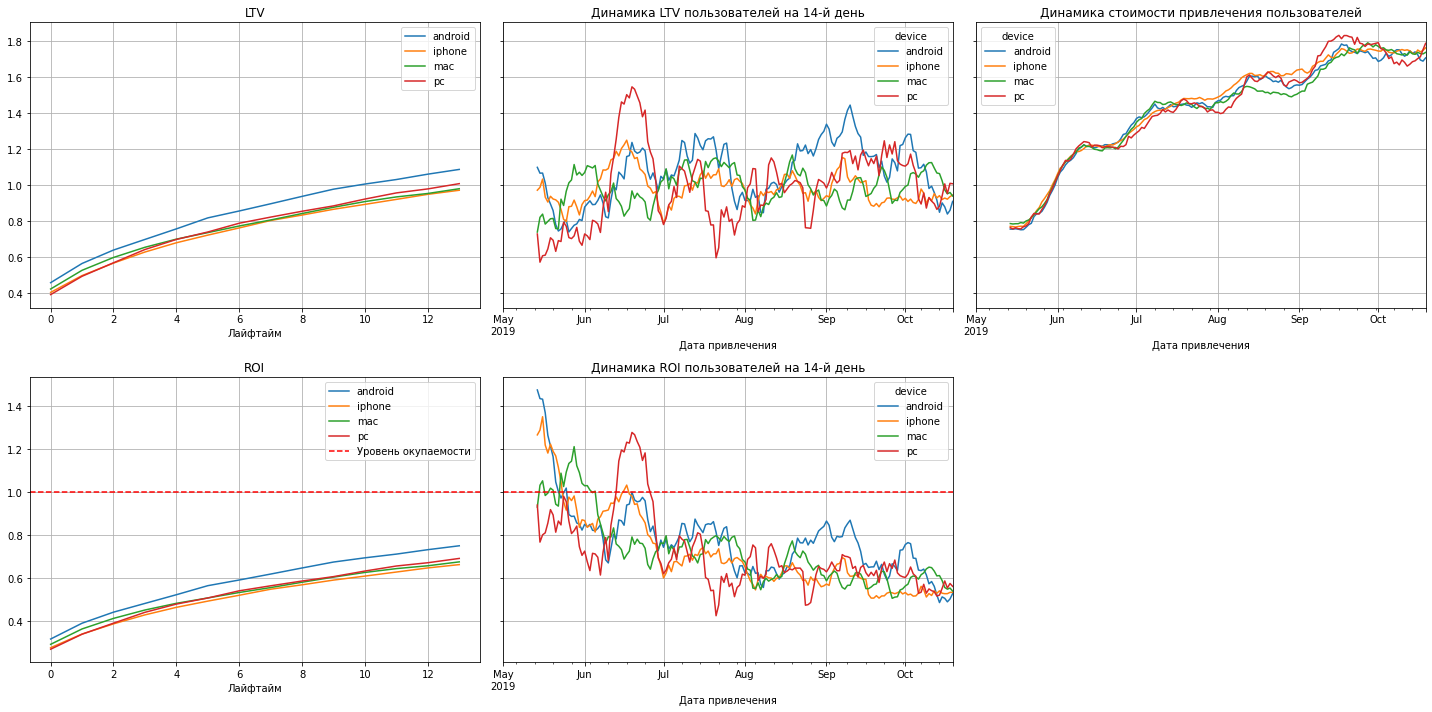

In [36]:
#посмотрим показатели отдельно по США для устройств
profiles_usa = profiles.query('region == "united states"')
result_raw_usa, ltv_usa, ltv_history_usa, roi_usa, roi_history_usa = (get_ltv_roi(profiles_usa, orders, observ_date,
                                                                                  horizon_days,dimensions=['device']))
plot_ltv_roi(ltv_usa, ltv_history_usa, roi_usa, roi_history_usa, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы по рекламе в `США`:
* LTV чуть выше у `Android`, явных "отстающих" нет
* стоимость привлечения резко увеличивается со второй половины мая для всех и похожа на кривую по каналу `TipTop`
* ROI не окупается для всех

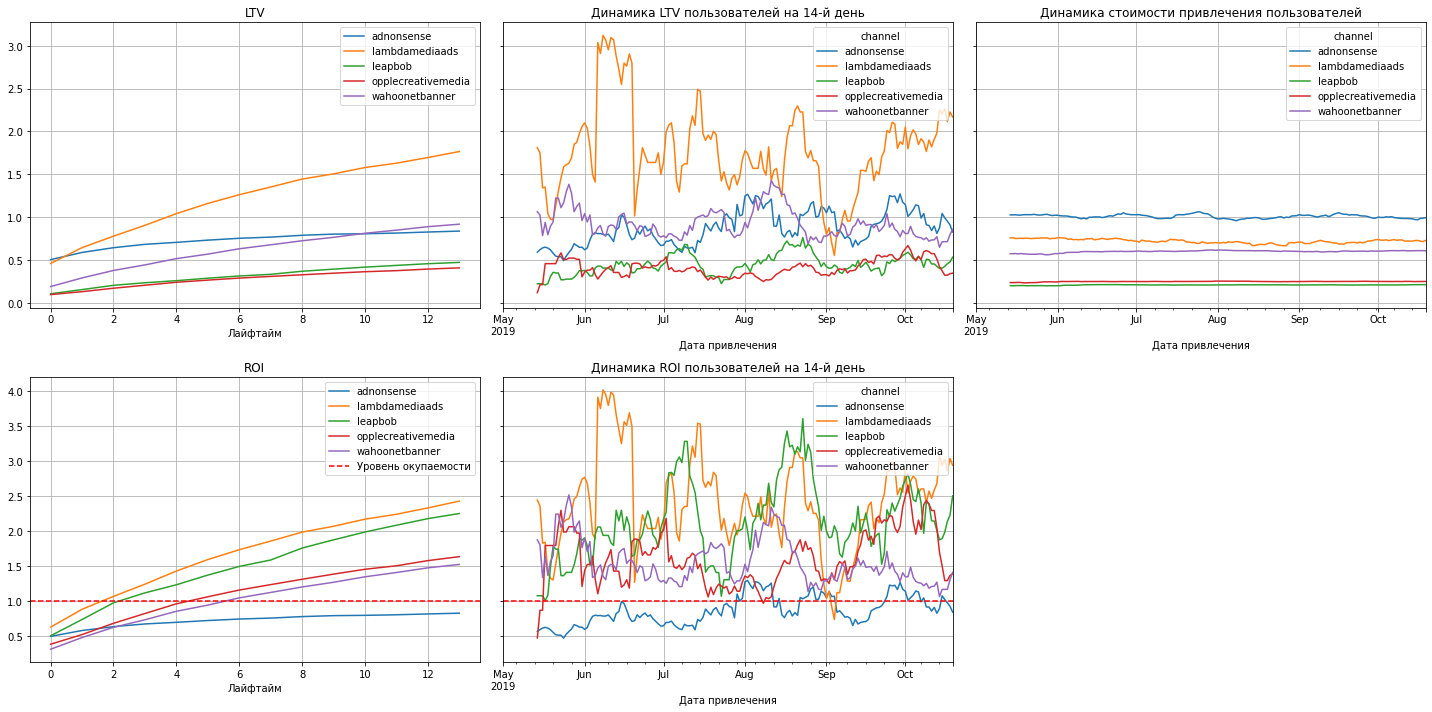

In [37]:
#посмотрим показатели отдельно по Европе для каналов
profiles_eu = profiles.query('region != "united states"')
result_raw_eu, ltv_eu, ltv_history_eu, roi_eu, roi_history_eu = (get_ltv_roi(profiles_eu, orders, observ_date,
                                                                                  horizon_days,dimensions=['channel']))
plot_ltv_roi(ltv_eu, ltv_history_eu, roi_eu, roi_history_eu, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы по рекламе в Европе:
* LTV заметно выше у `Lambdamediaads`, в серединке `Adnonsense` и `Wahoonetbanner`, последние места за  `Leapbob` и `Opplecreativemedia`
* стоимость привлечения здесь стабильна
* ROI окупается для всех, кроме `Adnonsense`

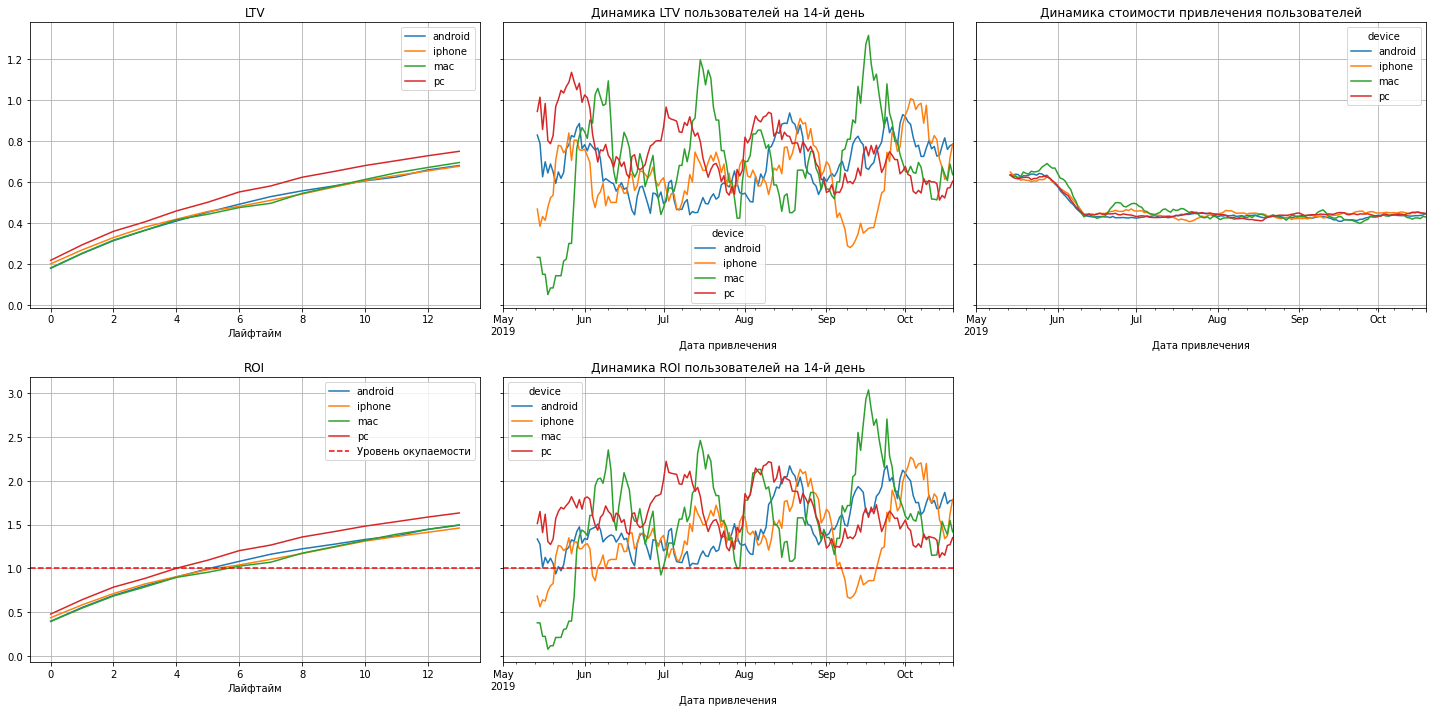

In [38]:
#посмотрим показатели отдельно по Европе для каналов
profiles_eu = profiles.query('region != "united states"')
result_raw_eu, ltv_eu, ltv_history_eu, roi_eu, roi_history_eu = (get_ltv_roi(profiles_eu, orders, observ_date,
                                                                                  horizon_days,dimensions=['device']))
plot_ltv_roi(ltv_eu, ltv_history_eu, roi_eu, roi_history_eu, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы по рекламе в Европе:
* у `РС` LTV чуть выше чем у других
* стоимость привлечения здесь стабильна
* ROI окупается для всех, где-то с 3го дня

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

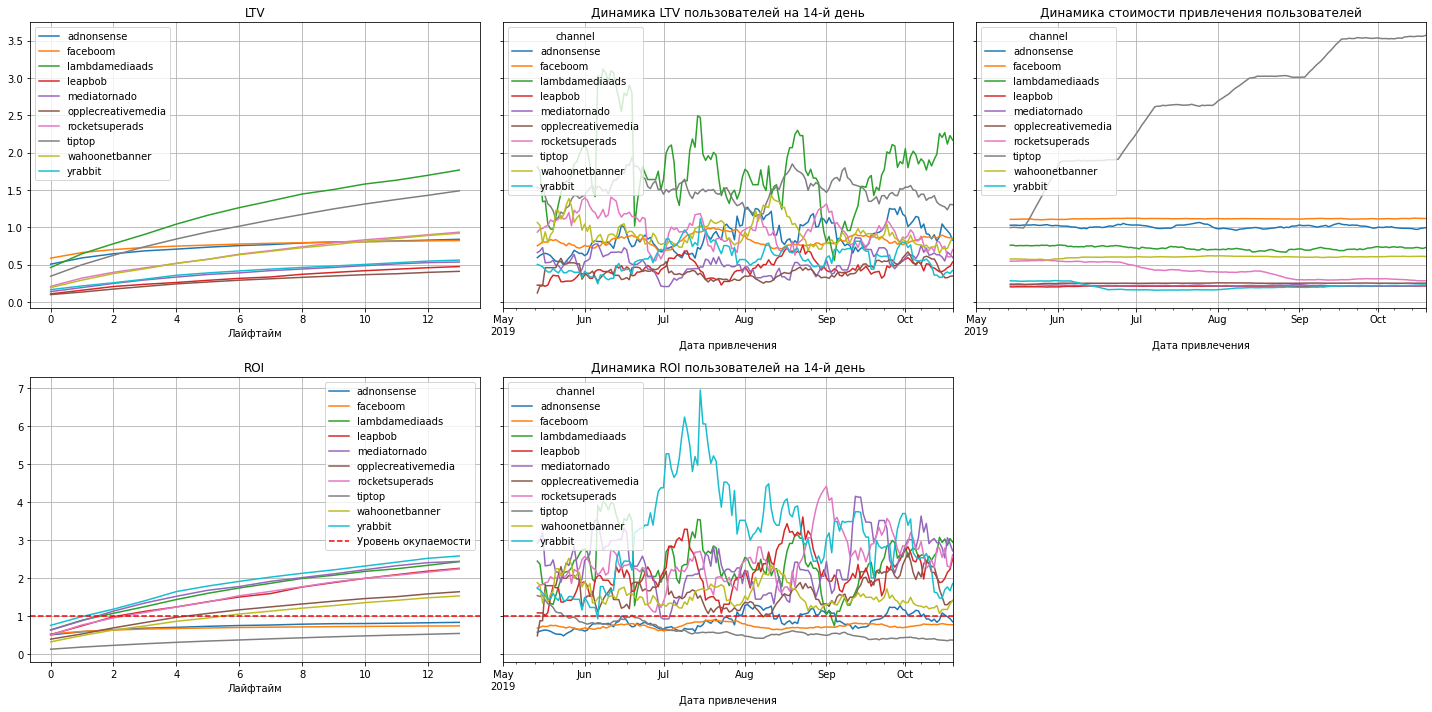

In [39]:
#получаем данные и строим графики
result_raw, ltv, ltv_history, roi, roi_history = (get_ltv_roi(profiles, orders, observ_date,
                                                              horizon_days,dimensions=['channel'])
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

<div style="border:solid green 1px; padding: 10px">

По графикам можно сделать такие выводы:
    
* Реклама не окупается по `TipTop`, `Faceboom` и `Adnonsense`.
* Стоимость привлечения стабильна и примерно одинакова для всех каналов , кроме `TipTop`.
* LTV стабилен, пользователи из каналов `Lambdamediaads`и `TipTop` лучше остальных.

### Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

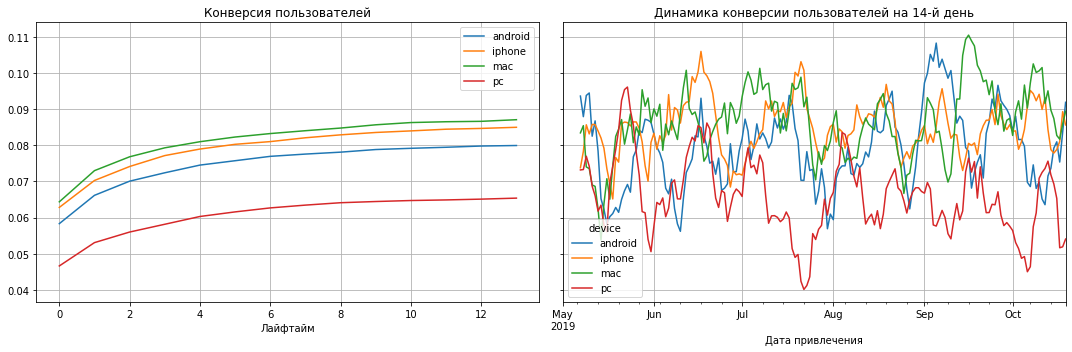

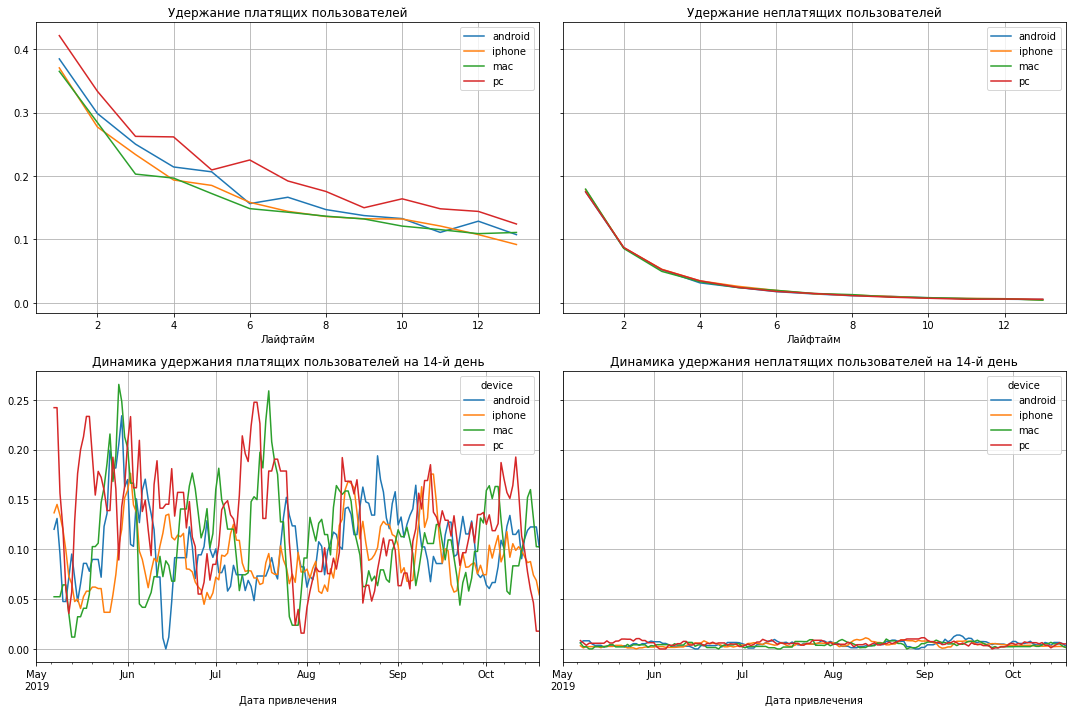

In [40]:
#получаем данные и строим графики конверсии и удержания по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observ_date,
                                                              horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observ_date,
                                                                    horizon_days, dimensions=['device'])
plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid green 1px; padding: 10px">

Конверсия  пользователей `РС` самая низкая из всех (также как и LTV пользователей), хотя удержание платящих по этому устройству самое высокое, что, возможно, и дает окупаемость рекламы по этому устройству. Остальные показатели примерно на одном уровне.

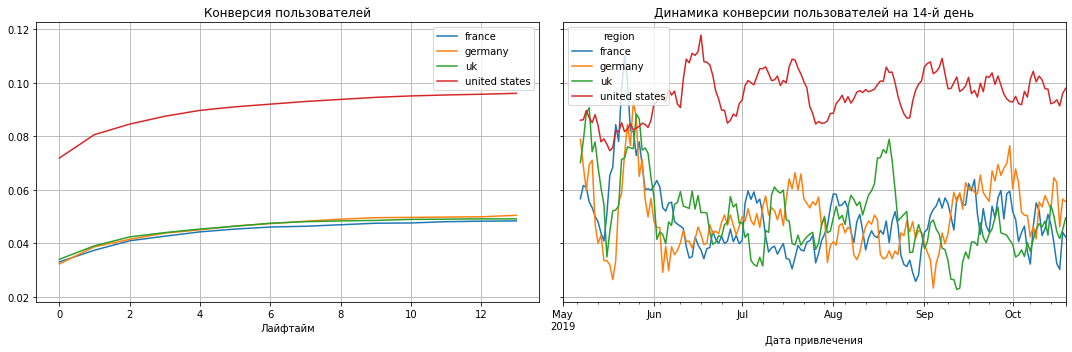

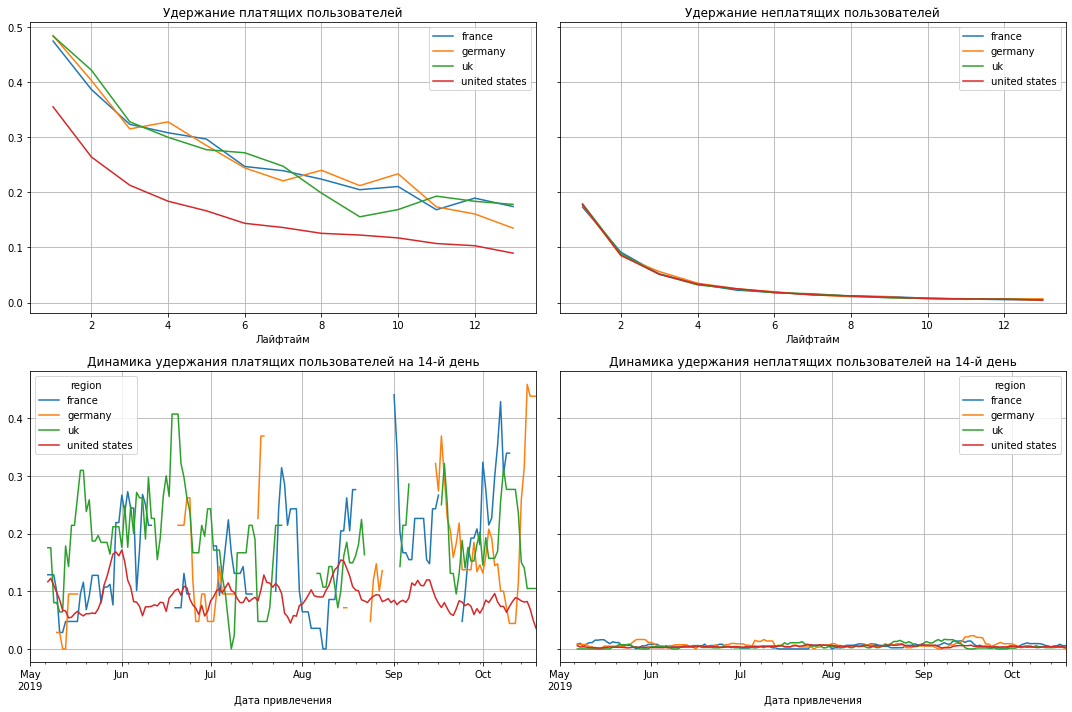

In [41]:
#получаем данные и строим графики конверсии по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observ_date,
                                                              horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observ_date,
                                                                    horizon_days, dimensions=['region'])
plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid green 1px; padding: 10px">

Конверсия  пользователей из США самая высокая из всех (также как и LTV пользователей), хотя удержание платящих по этой стране самое низкое, что, возможно, дает "провис" окупаемости рекламы. Остальные показатели примерно на одном уровне.

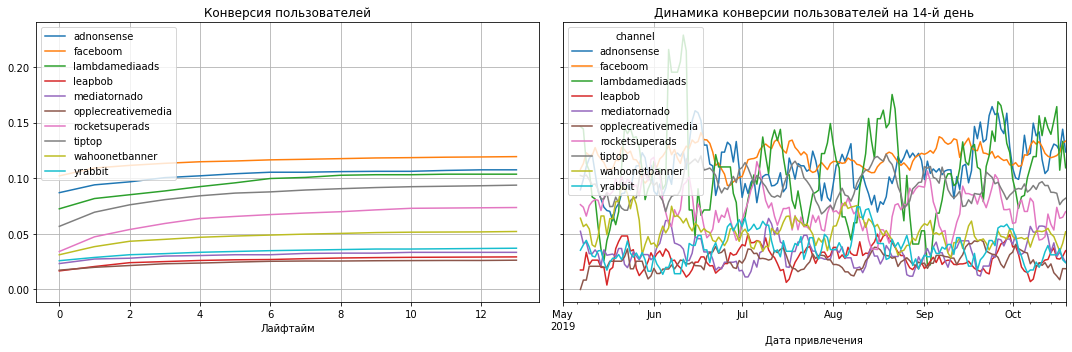

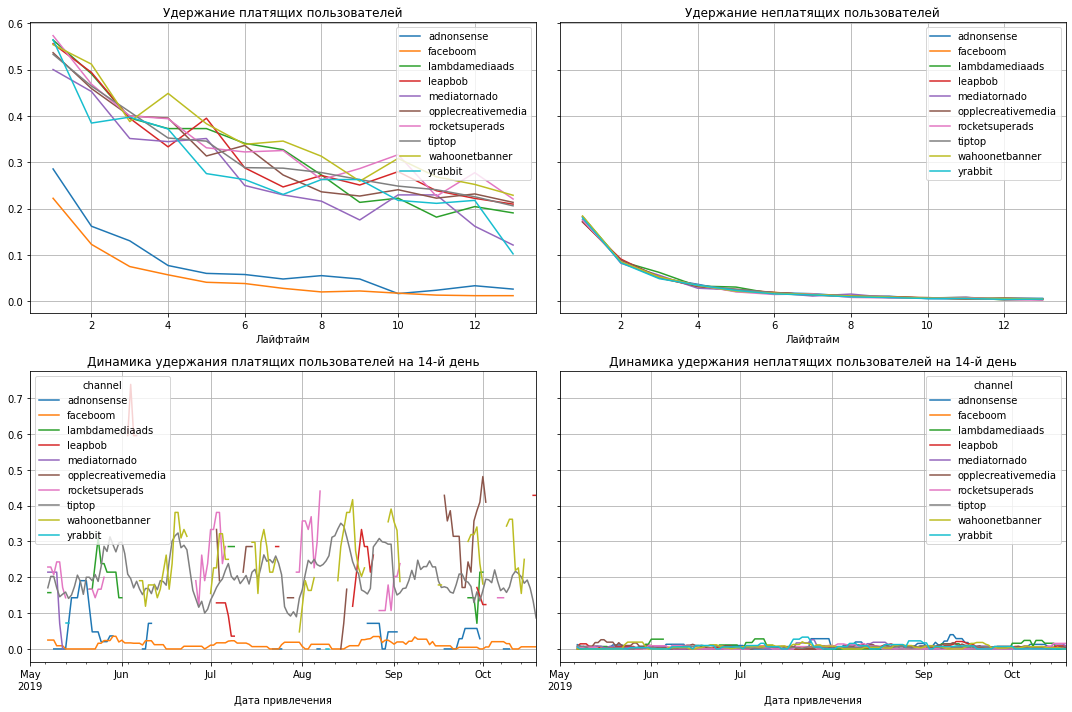

In [42]:
#получаем данные и строим графики конверсии по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observ_date,
                                                              horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observ_date,
                                                                    horizon_days, dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid green 1px; padding: 10px">

Конверсия  пользователей из `Faceboom` выше всех, хотя удержание платящих по этому каналу, а также по `Adnonsense` очень низкое, что, возможно, и дает не окупаемость рекламы по этим каналам. Остальные показатели примерно на одном уровне.

<div style="border:solid green 2px; padding: 20px">

## Вывод
 
Нам были доступны данные по логам сервера с данными о посещениях приложения Procrastinate Pro+ новыми пользователями, зарегистрировавшимися в период с 01.05.2019 по 27.10.2019, выгрузка их покупок за этот период, а также статистика рекламных расходов. 

Мы изучили выборку и выявили, что:
        
1. Посететители приходят к нам из:
* США
* Франции
* Германии
* Великобритании.

Больше всего платящих пользователей из `США` (6902 человека) их доля от общего числа пользователей приложения составляет больше 4.5%, а меньше всего из `Германии` (616 человек) и их доля меньше половины процента (0.41%).

2. Наши пользователи используют следующие устройства:
* Mac
* IPhone
* PC
* Android

Больше всего платящих пользователей заходят с `IPhone` (3382 человека) - доля 2.25% от всех использующих приложение пользователей, а меньше всего c `PC` (1537 человек) - доля 1.02% от общего.

3. Каналы привлечения пользователей:

* Faceboom
* Organic
* Adnonsense
* Yrabbit
* Mediatornado
* Rocketsuperads
* Leapbob
* Tiptop
* Wahoonetbanner
* Opplecreativemedia
* Lambdamediaads

Больше всего платящих пользователей пришло по каналу `Faceboom` (3557 человек) и это 2.37% от общего числа пользователей приложения, а меньше всего по `Mediatornado` (156 человек), что составляет 0.10%.

4.  Всего потратили на привлечение пользователей  105 497,30. Из них больше всего на канал `TipTop` - 54 751,30, а меньше всего на канал `Yrabbit` - 944,22. Самым затратным вышел сентябрь, почти 22,5 тысячи и меньше всего потратили в мае - около 10 тысяч.

5. Траты на привлечение по всем каналам стабильны, кроме `TipTop`, затраты на который "скачут" от месяца к месяцу довольно резко на увеличение (от ≈ 1.35 в мае до ≈ 3.55 в октябре). Самое дешевое привлечение обходится компании в среднем в ≈ 0.21 (канал `Leapbob`), а самое дорогое по каналу `TipTop`- ≈ 2.80.     

6. В целом реклама не окупается:
* ROI в конце второй недели — около 80%, т.е. можно сказать, что величина затрат не превысила порог окупаемости. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, но при данных затратах этого не происходит, с середины июня динамика ROI стабильно ниже порога окупаемости.
   - относительно устройств: не окупается по всем устройствам, кроме `PC` (с 11го дня);
   - относительно стран: не окупается только по `США`, остальные страны, с 4-5 дней, окупаются;
   - относительно каналов:  не окупается по `TipTop`, `Faceboom` и `Adnonsense`.
* CAC не стабилен.
    - относительно устройств: cтоимость привлечения плавно увеличивается и примерно одинакова для `Mac` и `Iphone`, а по `Android` и `PC` она ниже;
    - относительно стран: cтоимость привлечения стабильна и примерно одинакова для всех стран, кроме `США`, кривая графика  очень похожа на график по тратам на канал `TipTop`.
    - относительно каналов: стоимость привлечения стабильна и примерно одинакова для всех каналов, кроме `TipTop`.

* LTV достаточно стабилен. Значит, с качеством пользователей все нормально. Но его значение не превышает САС на одного пользователя, а следовательно средняя накопительная выручка от одного клиента не превышает средние затраты на его привлечение.
   - относительно устройств: качество `PC` пользователей чуть хуже остальных;
   - относительно стран: показатель стабилен и примерно одинаков для всех, кроме `США`, пользователи оттуда сильно лучше;
   - относительно каналов: пользователи из каналов `Lambdamediaads` и `TipTop` качественнее остальных.
    
Скорее всего, окупаемость "не дотягивает" до плюса из-за скачкообразного увеличения рекламного бюджета на привлечение через канал `TipTop`. 
    
7 Конверсия относительно 
    - устройств (конверсия пользователей `РС` самая низкая из всех (также как и LTV пользователей), хотя удержание платящих по этому устройству самое высокое, что, возможно, и дает окупаемость рекламы по этому устройству. Остальные показатели примерно на одном уровне),
    - стран (конверсия пользователей из `США` самая высокая из всех (также как и LTV пользователей), хотя удержание платящих по этой стране самое низкое, что, возможно, дает "провис" окупаемости рекламы. Остальные показатели примерно на одном уровне)
    - каналов (конверсия пользователей из `Faceboom` выше всех, хотя удержание платящих по этому каналу, а также по `Adnonsense` очень низкое, что, возможно, и дает не окупаемость рекламы по этим каналам. Остальные показатели примерно на одном уровне.)
   
    хорошая, но удержание пользователей, в целом по всем параметрам, низкое.

    
    
    
Для пользователей из `США` есть проблема высоких трат на рекламу через канал `TipTop`, что не компенсируется даже высоким качеством и конверсией пользователей этого канала.
    
Также стоит обратить внимание на каналы `Wahoonetbanner` и `Lambdamediaads`, на `Германию` и `Великобританию`, на пользователей `Android`, у них не плохие показатели удержания, конверсии и  LTV, а так же относительно низкие траты на привлечение, возможно, за счет дополнительной рекламной агитации с персоналными акциями для текущих и новых поьзователей, удатся оптимизировать текущую картину затрат.